In [159]:
import pandas as pd

In [171]:
# (1) Используя параметры pandas прочитать красиво пандас (подвох что заголовки - первые 2 линии)
df = pd.read_csv('default_of_credit_card_clients.csv', sep=';',header=1) #TODO

In [161]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [162]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [219]:
#TODO
from collections import Counter
print(Counter(df['SEX']==1))
Counter(df['EDUCATION'])

Counter({False: 18112, True: 11888})


ID                            8656
LIMIT_BAL                     8656
SEX                           8656
EDUCATION                     8656
MARRIAGE                      8656
AGE                           8656
PAY_0                         8656
PAY_2                         8656
PAY_3                         8656
PAY_4                         8656
PAY_5                         8656
PAY_6                         8656
BILL_AMT1                     8656
BILL_AMT2                     8656
BILL_AMT3                     8656
BILL_AMT4                     8656
BILL_AMT5                     8656
BILL_AMT6                     8656
PAY_AMT1                      8656
PAY_AMT2                      8656
PAY_AMT3                      8656
PAY_AMT4                      8656
PAY_AMT5                      8656
PAY_AMT6                      8656
default payment next month    8656
dtype: int64

In [222]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
Counter((df['SEX']==2) & (df['EDUCATION']==2))

woman = 0
for i, row in df.iterrows():
    if row['SEX']==2 and row['EDUCATION']==2:
        woman += 1
print(woman)

df['ID'][(df['SEX'] == 2) & (df['EDUCATION'] == 2)].count()

8656


8656

In [187]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
df.groupby('default payment next month').median().select(lambda col: col.startswith('BILL_') or col.startswith('PAY_'), axis=1)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1.0,0.0,0.0,0.0,0.0,0.0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [223]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table('ID',['SEX','EDUCATION'],'MARRIAGE','count',fill_value=0)

MARRIAGE        0     1     2   3
SEX EDUCATION                    
1   0           0     2     6   0
    1           1  1690  2633  30
    2           1  2370  2940  63
    3          12  1048   894  36
    4           0    18    23   1
    5           0    48    46   1
    6           0    14    11   0
2   0           0     2     4   0
    1           3  2032  4176  20
    2           5  4472  4080  99
    3          32  1813  1015  67
    4           0    34    45   2
    5           0   102    81   2
    6           0    14    10   2

In [ ]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
def abc(a):
        if a <=10000:
                return 'A'
        elif 10000 < a <=100000:
                return 'B'
        elif 100000 < a <=200000:
                return 'C'
        elif 200000 < a <=400000:
                return 'D'
        elif 400000 < a <=700000:
                return 'E'
        elif a >700000:
                return 'F'
df['new_col'] = df['LIMIT_BAL'].map(abc)

In [202]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

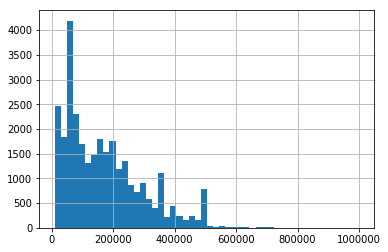

In [203]:
df['LIMIT_BAL'].hist(bins=50) #TODO

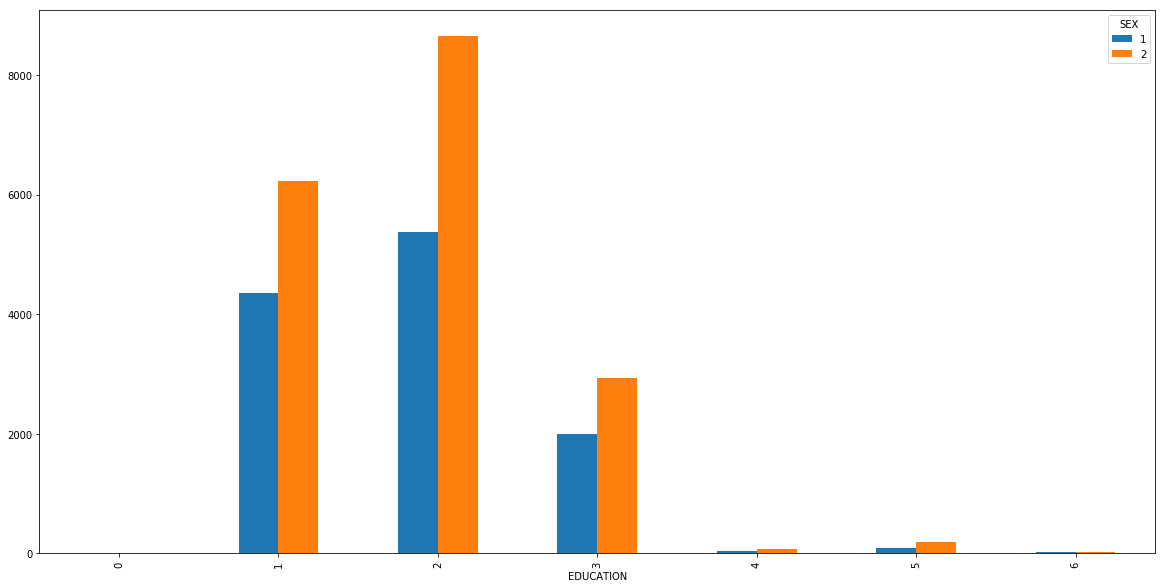

In [217]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
fig, ax = plt.subplots(figsize=(20,10))
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'count').plot(kind='bar', stacked=False, ax=ax) #TODO

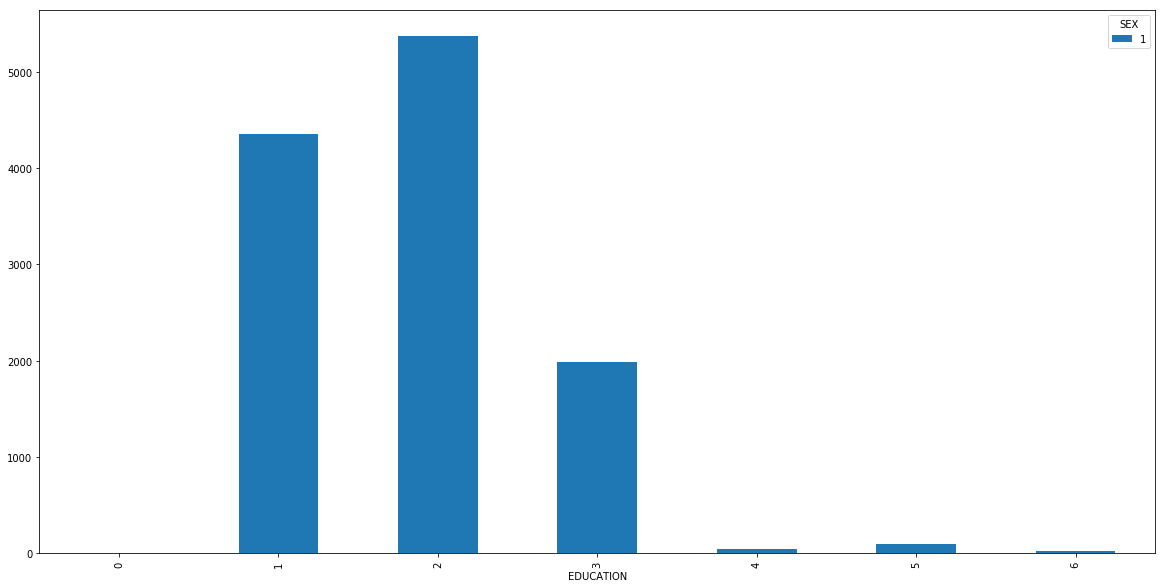

In [226]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO
fig, ax = plt.subplots(figsize=(20,10))
df[df['SEX']==1].pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'count').plot(kind='bar', stacked=False, ax=ax)

In [227]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#TODO

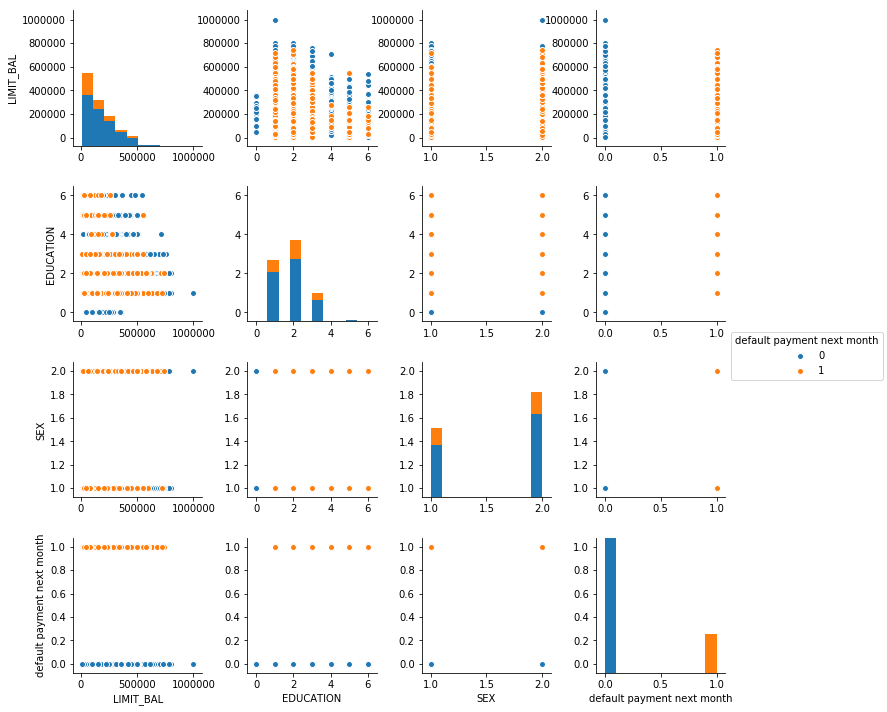

In [246]:
df = df[['LIMIT_BAL', 'EDUCATION', 'SEX','default payment next month']]
sns.pairplot(df, hue='default payment next month')